# Aufgaben
- Texte zu den einzelnen Inhaltspunkte schreiben
- Graphen einfügen und dessen interpretation (optional, da man es sonst mündlich macht)
- Interaktive Graphen:
  - Auswahl der Zeiträumen (monatlich und Jährlich) durch slider und dropdown
  - Ein- und Ausblenden von Linien (glättender Durschnitt
  - Hover-Info an einem Punkt (Datum, Wert, Veränderung) für Details, ...
  - *Str* + *f* und nach todo suchen, für diese Dinge
  - kovarianz oder korealaanz
  - STL Dekompistion
  - mehr daten

# Eine Analyse des Verbraucherpreisindex
## Einfache Zeitreihen 
### Abstrakt (optional)
Hier eine Zusammenfassung mit den Ergebnissen 

### Inhaltsverzeichnis
1. Fragestellung
2. Was ist der Verbraucherpreisindex?
3. Was sind Zeitreihen?
4. Methoden
5. Über die Daten
6. Analyse
   - Mustererkennung
   - Trend
   - Ausreißer
7. Fazit und Ausblick

## Fragestellung
- Was ist der Zweck dieser Analyse?
- Was ist das Ziel der Analyse?, was wollen wir mithilfen der Daten herausfinden?, Welche Fragen zu den Daten wollen wir beantwortet haben?
- Beispiele: "Wie hat sich der VPI über die Jahre verändert?", ...

## Was ist VPI?
- Konjukturzyklus [Konjuktzurzklyus Kitchin-Zyklus](https://karrierebibel.de/konjunkturzyklus/#:~:text=Ein%20vollst%C3%A4ndiger%20Konjunkturzyklus%20dauert%20in%20der%20Regel%20zwischen,weshalb%20die%20Dauer%20nicht%20pauschal%20festgelegt%20werden%20kann.)
- 

## Was sind Zeitreihen?
- Was sind Zeitreihen? Warum ist der VPI eine Zeitreihe?
- Use Case
- Beispiel: Definition, Komponente (Trend, Saison, ...)

## Methoden
Erklärung der jeweiligen Methoden
- STL Dekompistion
- Mustererkennung (Trend, saisonal?,...)
- Ausreißererkennung mithilde con IQR boxplot
- Regression (Trend),
<br> die wir nutzen um unsere Daten zu analysieren


## Über die Daten
*Hier erzählen wir allgemein über die Daten. z.B. Woher wir sie haben. Und anhand der Beiden Graphen unten, werden wir die Daten dann noch etwas näher betrachten zum Überblick, bevor wir in die Analyse reingehen*
- Erklärung der Preisindex, Zeitreihen (Ihre Komponente)
- Erklärung der Daten, wie sehen sie aus (Spalten)?

Weitere Implementierung (optional): Ein Slider oder Dropdown, um die einzelnen Jahren der VPI aussehen könnten

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interactive, interact, SelectMultiple
from sklearn.linear_model import LinearRegression 
import plotly.express as px
import plotly.io as pio

In [2]:
df = pd.read_csv("61111-0002_de.csv")
df.head()

,Jahr,Monat,Verbraucherpreisindex,Veränderung zum Vorjahresmonat,Veränderung zum Vormonat
0,2020,Januar,99.8,2.1,-0.2
1,2020,Februar,100.1,2.0,0.3
2,2020,März,100.3,1.8,0.2
3,2020,April,100.4,1.0,0.1
4,2020,Mai,100.4,0.8,-


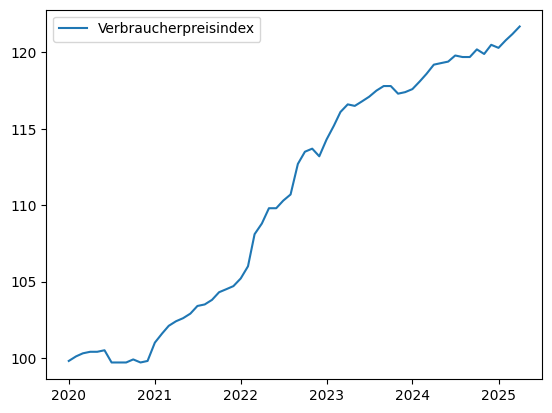

In [3]:
# combining month and year to a single date
monate_deutsch = {
    "Januar": 1, "Februar": 2, "März": 3, "April": 4,
    "Mai": 5, "Juni": 6, "Juli": 7, "August": 8,
    "September": 9, "Oktober": 10, "November": 11, "Dezember": 12
}

df["Monat"] = df["Monat"].map(monate_deutsch)

df['Datum'] = pd.to_datetime(dict(year=df["Jahr"], month=df["Monat"], day=1))

# plot
x = df['Datum']
y_1 = df['Verbraucherpreisindex']
y_2 = df['Veränderung zum Vormonat']
y_3 = df['Veränderung zum Vorjahresmonat']

plt.plot(x,y_1, label = "Verbraucherpreisindex")

plt.legend()
plt.show()

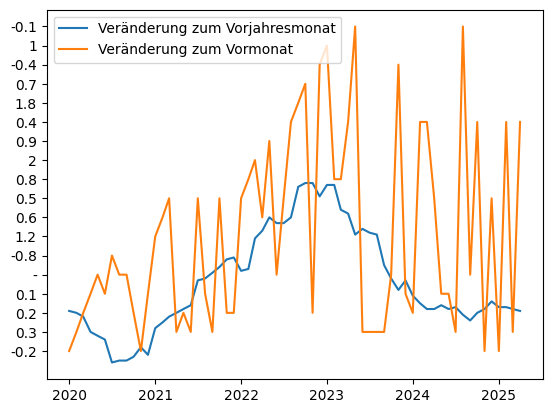

In [4]:
plt.plot(x, y_3, label = "Veränderung zum Vorjahresmonat")
plt.plot(x, y_2, label = "Veränderung zum Vormonat")

plt.legend()
plt.show()

## Analyse

### Mustererkennung
*Ein Vergleich Jahr für Jahr, um mögliche Pattern (Seasonal, cyclic oder random) feststellen zu können. Eventuell zuvor die Monate glätten durch den gleitenden Durschnitt für bessere Visualisierung und Vergleich*

Visuell: Liniendiagramm für die einzelnen Jahren, Heatmap




In [5]:
@interact(jahre=SelectMultiple(options=sorted(df["Jahr"].unique()), value=[2023]))
def plot_vpi(jahre):
    df_sel = df[df["Jahr"].isin(jahre)]

    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_sel, x="Monat", y="Verbraucherpreisindex", hue="Jahr", marker="o", palette="dark" )
    plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
    plt.title("VPI-Verlauf der ausgewählten Jahre")
    plt.ylabel("Verbraucherpreisindex")
    plt.xlabel("Monat")
    plt.legend(title="Jahr")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


interactive(children=(SelectMultiple(description='jahre', index=(3,), options=(np.int64(2020), np.int64(2021),…

*STR*+*Klick* für Mehrfachauswahl

In [6]:

# Liste der Jahre
jahre_verfügbar = sorted(df["Jahr"].unique())

@interact(jahre=SelectMultiple(options=jahre_verfügbar, value=[jahre_verfügbar[-1]]))
def plot_veraenderung(jahre):
    df_sel = df[df["Jahr"].isin(jahre)]

    sns.set(style="whitegrid")
    g = sns.relplot(
        kind="line",
        data=df_sel,
        x="Monat",
        y="Veränderung zum Vormonat",
        hue="Jahr",
        marker="o",
        height=6,
        aspect=1.5,
        palette="deep"  # << dunklere Farben
    )

    g.set_axis_labels("Monat", "Veränderung zum Vormonat")
    g._legend.set_title("Jahr")
    plt.xticks(
        ticks=range(1, 13),
        labels=["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"]
    )
    plt.title("Veränderung zum Vormonat pro Jahr", fontsize=14)
    plt.tight_layout()
    plt.show()


interactive(children=(SelectMultiple(description='jahre', index=(5,), options=(np.int64(2020), np.int64(2021),…

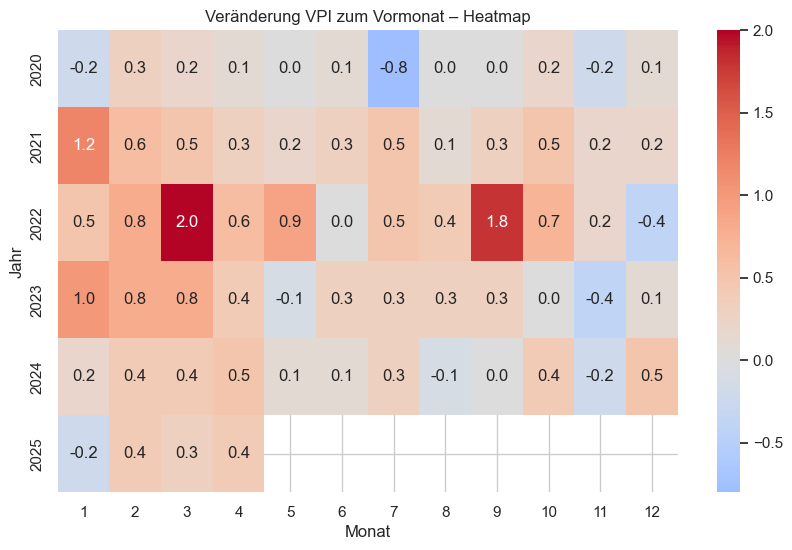

In [7]:
# Monats-Spalte in Kategorie mit Reihenfolge umwandeln
df_copy = df.copy()

# Veränderungsspalte in numerisch umwandeln, Fehler zu NaN
df_copy["Veränderung zum Vormonat"] = pd.to_numeric(
    df_copy["Veränderung zum Vormonat"], errors='coerce'
)

# NaN mit 0 ersetzen (optional)
df_copy["Veränderung zum Vormonat"] = df_copy["Veränderung zum Vormonat"].fillna(0)

# Pivot-Tabelle erstellen (Jahr x Monat)
pivot = df_copy.pivot(index="Jahr", columns="Monat", values="Veränderung zum Vormonat")

# Heatmap plotten
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="coolwarm", center=0, annot=True, fmt=".1f")
plt.title("Veränderung VPI zum Vormonat – Heatmap")
plt.ylabel("Jahr")
plt.xlabel("Monat")
plt.show()

### Trend
*Hier eine lineare Regresssion (evtl. log reg), um den Trend (negative/ positiv) bestimmen zu können*

Visuell: Liniendiagramm mit Graph *VPI* und Graph *Regression*

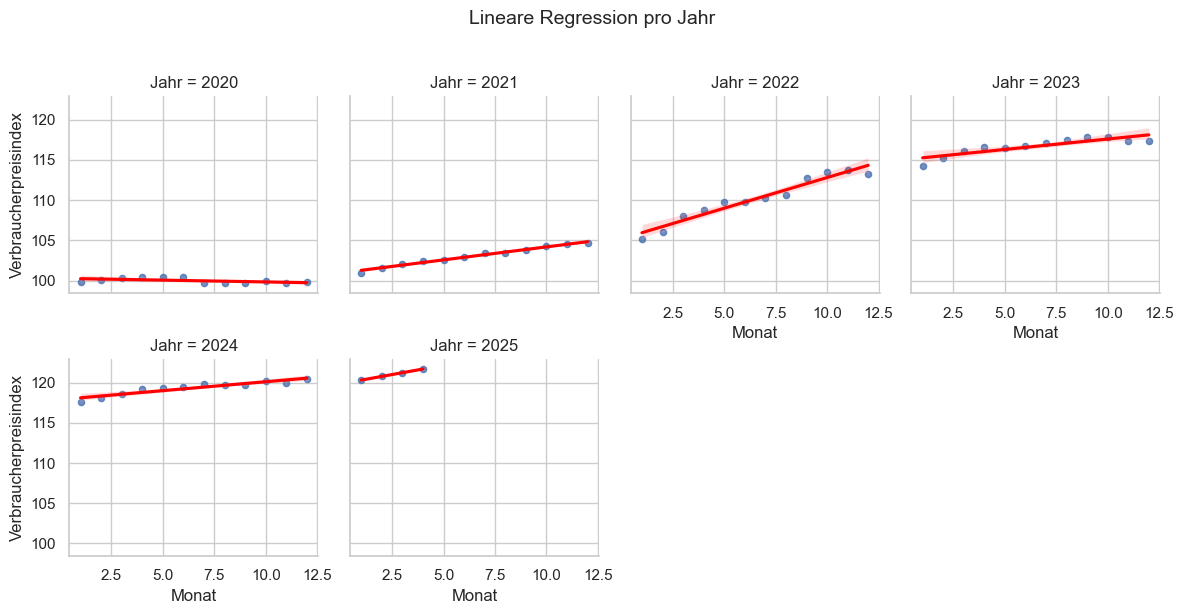

In [8]:
sns.lmplot(
    data=df,
    x="Monat", 
    y="Verbraucherpreisindex", 
    col="Jahr",          # jede Spalte = 1 Jahr
    col_wrap=4,          # 4 Plots pro Zeile
    height=3, 
    aspect=1,
    scatter_kws={"s": 20}, 
    line_kws={"color": "red"}
)

plt.suptitle("Lineare Regression pro Jahr", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


In [9]:
print(df["Monat"].unique())

df['Datum'] = pd.to_datetime(dict(year=df["Jahr"], month=df["Monat"], day=1))

jahre = df['Jahr'].unique()

for jahr in sorted(jahre):
    df_jahr = df[df['Jahr'] == jahr]
    
    X = df_jahr["Monat"].values.reshape(-1, 1)
    y = df_jahr["Verbraucherpreisindex"].values

    model = LinearRegression()
    model.fit(X, y)

    steigung = model.coef_[0]
    intercept = model.intercept_
    r2 = model.score(X, y)

    print(f"Jahr {jahr}: Steigung = {steigung:.2f}, Achsenabschnitt = {intercept:.2f}, R² = {r2:.2f}")




[ 1  2  3  4  5  6  7  8  9 10 11 12]
Jahr 2020: Steigung = -0.04, Achsenabschnitt = 100.29, R² = 0.26
Jahr 2021: Steigung = 0.32, Achsenabschnitt = 100.97, R² = 0.99
Jahr 2022: Steigung = 0.76, Achsenabschnitt = 105.20, R² = 0.94
Jahr 2023: Steigung = 0.26, Achsenabschnitt = 115.01, R² = 0.77
Jahr 2024: Steigung = 0.22, Achsenabschnitt = 117.89, R² = 0.88
Jahr 2025: Steigung = 0.46, Achsenabschnitt = 119.85, R² = 1.00


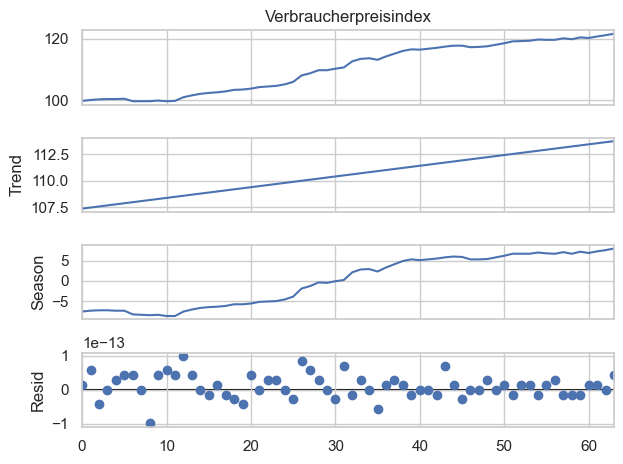

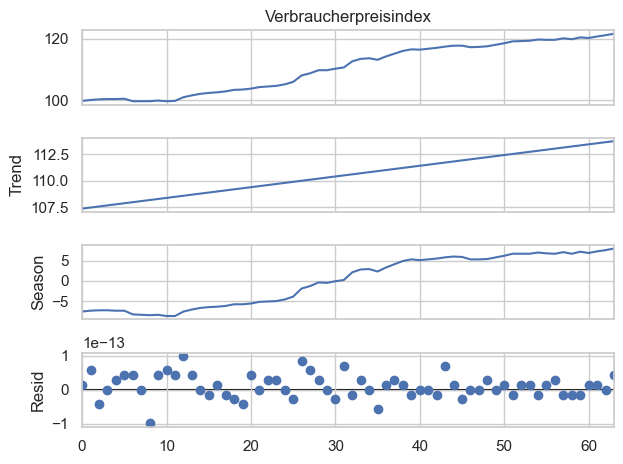

In [16]:
from statsmodels.tsa.seasonal import STL

stl = STL(df["Verbraucherpreisindex"], period=60) 
res = stl.fit()
res.plot()


### Ausreißer
*Ereignisse wie Corona und der Krieg zwischen der Ukraine und Russland sind Faktoren, die zu Ausreißer führen. Hier geht es darum sie darzustellen.*

Visuell: Boxplot, Scatter diagram 

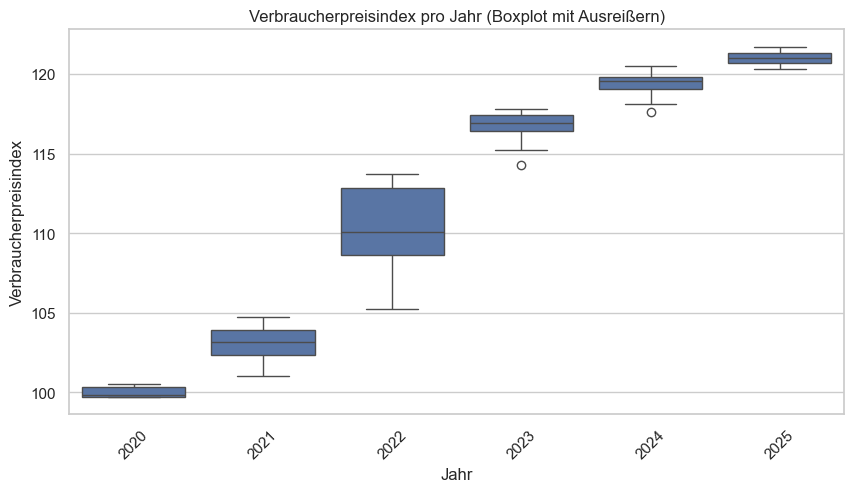

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Jahr", y="Verbraucherpreisindex")
plt.title("Verbraucherpreisindex pro Jahr (Boxplot mit Ausreißern)")
plt.xticks(rotation=45)
plt.show()

In [11]:
sns.set(style="whitegrid")

def plot_boxplot_jahr_gesamt(jahr):
    df_jahr = df[df['Jahr'] == jahr]
    
    plt.figure(figsize=(6,6))
    sns.boxplot(y=df_jahr['Verbraucherpreisindex'], color='skyblue')
    plt.title(f"Boxplot Verbraucherpreisindex für das Jahr {jahr}")
    plt.ylabel("Verbraucherpreisindex")
    plt.xticks([])  # keine x-Achse, da nur eine Box
    plt.tight_layout()
    plt.show()

jahre = sorted(df['Jahr'].unique())
interact(plot_boxplot_jahr_gesamt, jahr=jahre)




interactive(children=(Dropdown(description='jahr', options=(np.int64(2020), np.int64(2021), np.int64(2022), np…

<function __main__.plot_boxplot_jahr_gesamt(jahr)>

In [12]:
# Set renderer for Jupyter Notebook
pio.renderers.default = "notebook"  # ggf. "iframe", "vscode", "browser" ausprobieren

def plot_boxplot_jahr_plotly(jahr):
    df_jahr = df[df['Jahr'] == jahr]
    
    fig = px.box(
        df_jahr,
        y="Verbraucherpreisindex",
        hover_data=["Monat"],
        points="all",
        title=f"Boxplot Verbraucherpreisindex – Jahr {jahr}"
    )
    fig.update_layout(height=500, width=500)
    fig.show()

jahre = sorted(df['Jahr'].unique())
interact(plot_boxplot_jahr_plotly, jahr=jahre)

interactive(children=(Dropdown(description='jahr', options=(np.int64(2020), np.int64(2021), np.int64(2022), np…

<function __main__.plot_boxplot_jahr_plotly(jahr)>

In [13]:
for jahr in sorted(jahre):
    df_jahr = df[df["Jahr"] == jahr]
    
    q1 = df_jahr["Verbraucherpreisindex"].quantile(0.25)
    q3 = df_jahr["Verbraucherpreisindex"].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    ausreisser = df_jahr[
        (df_jahr["Verbraucherpreisindex"] < lower_bound) |
        (df_jahr["Verbraucherpreisindex"] > upper_bound)
    ]
    
    if not ausreisser.empty:
        print(f"\nAusreißer im Jahr {jahr}:")
        print(ausreisser.to_string(index=False))
    else:
        print(f"\nKeine Ausreißer im Jahr {jahr}.")



Keine Ausreißer im Jahr 2020.

Keine Ausreißer im Jahr 2021.

Keine Ausreißer im Jahr 2022.

Ausreißer im Jahr 2023:
 Jahr  Monat  Verbraucherpreisindex  Veränderung zum Vorjahresmonat Veränderung zum Vormonat      Datum
 2023      1                  114.3                             8.7                        1 2023-01-01

Ausreißer im Jahr 2024:
 Jahr  Monat  Verbraucherpreisindex  Veränderung zum Vorjahresmonat Veränderung zum Vormonat      Datum
 2024      1                  117.6                             2.9                      0.2 2024-01-01

Keine Ausreißer im Jahr 2025.


## Fazit und Ausblick
- Theorie, Methoden und Ergebnisse zusammenfassen
- Ausblick:
  - Mögliche Erweiterungen:
    - Korrelation zwischen VBI und den einzelnen VBI 'Arten'
    - EU-Weite Betrachtung, aber dazu den HVPI nehmen
    - forecasting
 
  - Ziel: Simples VPI Dashboard & Explorer für Deutschland
 
